#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape, " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape , " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

model = Sequential()

#卷積層1與池化層1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3),  activation='relu',  padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())

model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))

model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [7]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(history, train_acc,test_acc):
    plt.plot(history.history[train_acc])
    plt.plot(history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_accuracy'], loc='upper left')
    plt.show()

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 112s 3ms/step - loss: 1.3086 - accuracy: 0.5343 - val_loss: 1.3683 - val_accuracy: 0.5431
Epoch 2/12
37500/37500 [==============================] - 111s 3ms/step - loss: 1.2824 - accuracy: 0.5445 - val_loss: 1.3323 - val_accuracy: 0.5662
Epoch 3/12
37500/37500 [==============================] - 120s 3ms/step - loss: 1.2649 - accuracy: 0.5500 - val_loss: 1.3412 - val_accuracy: 0.5658
Epoch 4/12
37500/37500 [==============================] - 113s 3ms/step - loss: 1.2459 - accuracy: 0.5583 - val_loss: 1.3035 - val_accuracy: 0.5790
Epoch 5/12
37500/37500 [==============================] - 107s 3ms/step - loss: 1.2293 - accuracy: 0.5621 - val_loss: 1.2850 - val_accuracy: 0.5833
Epoch 6/12
37500/37500 [==============================] - 109s 3ms/step - loss: 1.2137 - accuracy: 0.5686 - val_loss: 1.2777 - val_accuracy: 0.5813
Epoch 7/12
37500/37500 [==============================] - 111s

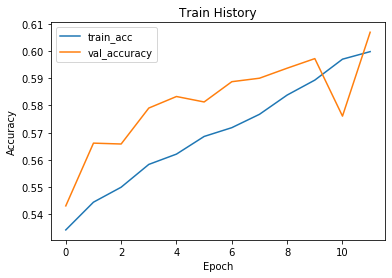

In [16]:
#模型編譯 loss='categorical_crossentropy'
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history1=model.fit(x_img_train_normalize,  y_label_train_OneHot,
                         validation_split=0.25,
                         epochs=12,  batch_size=128, verbose=1)    
show_train_history(train_history1, 'accuracy','val_accuracy')

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 147s 4ms/step - loss: 0.1752 - accuracy: 0.9306 - val_loss: 0.1884 - val_accuracy: 0.9256
Epoch 2/12
37500/37500 [==============================] - 113s 3ms/step - loss: 0.1750 - accuracy: 0.9305 - val_loss: 0.1875 - val_accuracy: 0.9260
Epoch 3/12
37500/37500 [==============================] - 116s 3ms/step - loss: 0.1744 - accuracy: 0.9307 - val_loss: 0.1867 - val_accuracy: 0.9268
Epoch 4/12
37500/37500 [==============================] - 111s 3ms/step - loss: 0.1737 - accuracy: 0.9311 - val_loss: 0.1863 - val_accuracy: 0.9268
Epoch 5/12
37500/37500 [==============================] - 127s 3ms/step - loss: 0.1739 - accuracy: 0.9312 - val_loss: 0.1874 - val_accuracy: 0.9265
Epoch 6/12
37500/37500 [==============================] - 107s 3ms/step - loss: 0.1736 - accuracy: 0.9314 - val_loss: 0.1864 - val_accuracy: 0.9267
Epoch 7/12
37500/37500 [==============================] - 112s

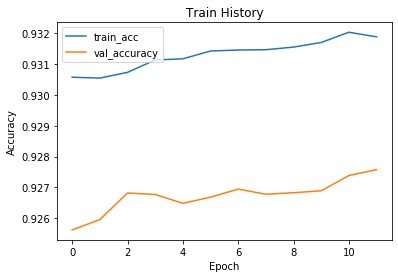

In [17]:
#模型編譯 loss='binary_crossentropy'
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history2=model.fit(x_img_train_normalize,  y_label_train_OneHot,
                         validation_split=0.25,
                         epochs=12,  batch_size=128, verbose=1) 
show_train_history(train_history2, 'accuracy','val_accuracy')

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 116s 3ms/step - loss: 0.0504 - accuracy: 0.6204 - val_loss: 0.0535 - val_accuracy: 0.6250
Epoch 2/12
37500/37500 [==============================] - 114s 3ms/step - loss: 0.0503 - accuracy: 0.6210 - val_loss: 0.0535 - val_accuracy: 0.6261
Epoch 3/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0504 - accuracy: 0.6232 - val_loss: 0.0537 - val_accuracy: 0.6242
Epoch 4/12
37500/37500 [==============================] - 109s 3ms/step - loss: 0.0503 - accuracy: 0.6219 - val_loss: 0.0535 - val_accuracy: 0.6244
Epoch 5/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0503 - accuracy: 0.6219 - val_loss: 0.0536 - val_accuracy: 0.6232
Epoch 6/12
37500/37500 [==============================] - 116s 3ms/step - loss: 0.0502 - accuracy: 0.6242 - val_loss: 0.0535 - val_accuracy: 0.6242
Epoch 7/12
37500/37500 [==============================] - 106s

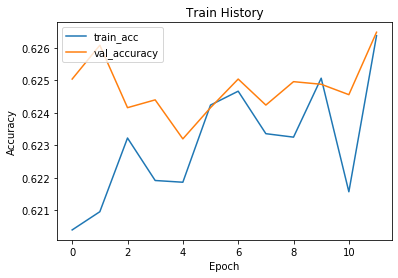

In [18]:
#模型編譯 loss='mean_squared_error'
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
train_history3=model.fit(x_img_train_normalize,  y_label_train_OneHot,
                         validation_split=0.25,
                         epochs=12,  batch_size=128, verbose=1)    
show_train_history(train_history3, 'accuracy','val_accuracy')